In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('ohio_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_deaths_50_lag', 'new_cases_10_mean', 'new_cases_3_lag', 'dew_point', 'current_intensive_care_patients', 'new_deaths_30_lag', 'new_cases_150_lag', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_2_lag', 'new_deaths_4_lag', 'new_cases_50_std', 'new_deaths_3_lag', 'new_cases_4_lag', 'new_deaths_7_lag', 'new_cases_10_min', 'relative_humidity', 'new_hospitalized_patients', 'new_cases_7_lag', 'new_cases_2_lag', 'new_deaths_1_lag', 'new_cases_10_max', 'new_deaths_100_std', 'new_cases_1 lag', 'average_temperature_celsius']]
covid_test = covid_test[['y', 'new_deaths_50_lag', 'new_cases_10_mean', 'new_cases_3_lag', 'dew_point', 'current_intensive_care_patients', 'new_deaths_30_lag', 'new_cases_150_lag', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_2_lag', 'new_deaths_4_lag', 'new_cases_50_std', 'new_deaths_3_lag', 'new_cases_4_lag', 'new_deaths_7_lag', 'new_cases_10_min', 'relative_humidity', 'new_hospitalized_patients', 'new_cases_7_lag', 'new_cases_2_lag', 'new_deaths_1_lag', 'new_cases_10_max', 'new_deaths_100_std', 'new_cases_1 lag', 'average_temperature_celsius']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4525.84349	validation_1-rmse:10798.36851
[1]	validation_0-rmse:4484.72989	validation_1-rmse:10722.49372
[2]	validation_0-rmse:4444.02766	validation_1-rmse:10647.44347
[3]	validation_0-rmse:4403.73329	validation_1-rmse:10573.25983
[4]	validation_0-rmse:4363.84206	validation_1-rmse:10499.87596
[5]	validation_0-rmse:4324.35031	validation_1-rmse:10427.33631
[6]	validation_0-rmse:4285.25376	validation_1-rmse:10355.60439
[7]	validation_0-rmse:4246.54914	validation_1-rmse:10284.73892
[8]	validation_0-rmse:4208.23076	validation_1-rmse:10214.70178
[9]	validation_0-rmse:4170.29717	validation_1-rmse:10145.51199
[10]	validation_0-rmse:4132.74158	validation_1-rmse:10077.05917
[11]	validation_0-rmse:4095.56480	validation_1-rmse:10009.32252
[12]	validation_0-rmse:4058.75898	validation_1-rmse:9942.12350
[13]	validation_0-rmse:4022.32305	validation_1-rmse:9875.99999
[14]	validation_0-rmse:3986.25366	validation_1-rmse:9810.31172
[15]	validation_0-rmse:3950.54693	validation_1-rmse:9

[130]	validation_0-rmse:1479.38455	validation_1-rmse:6022.89610
[131]	validation_0-rmse:1467.61890	validation_1-rmse:6011.96435
[132]	validation_0-rmse:1455.78077	validation_1-rmse:5999.69078
[133]	validation_0-rmse:1444.04870	validation_1-rmse:5987.88312
[134]	validation_0-rmse:1432.45263	validation_1-rmse:5977.63987
[135]	validation_0-rmse:1420.99902	validation_1-rmse:5966.12446
[136]	validation_0-rmse:1409.60671	validation_1-rmse:5954.79775
[137]	validation_0-rmse:1398.37039	validation_1-rmse:5943.56852
[138]	validation_0-rmse:1387.28473	validation_1-rmse:5934.22092
[139]	validation_0-rmse:1376.26467	validation_1-rmse:5923.43421
[140]	validation_0-rmse:1365.45092	validation_1-rmse:5913.83843
[141]	validation_0-rmse:1354.54217	validation_1-rmse:5903.81337
[142]	validation_0-rmse:1343.90022	validation_1-rmse:5895.55659
[143]	validation_0-rmse:1333.24283	validation_1-rmse:5885.72603
[144]	validation_0-rmse:1322.73850	validation_1-rmse:5875.97250
[145]	validation_0-rmse:1312.41511	valid

[260]	validation_0-rmse:585.81429	validation_1-rmse:5633.17616
[261]	validation_0-rmse:582.33030	validation_1-rmse:5633.45051
[262]	validation_0-rmse:578.76632	validation_1-rmse:5633.21963
[263]	validation_0-rmse:575.29775	validation_1-rmse:5632.72001
[264]	validation_0-rmse:571.87400	validation_1-rmse:5633.05184
[265]	validation_0-rmse:568.50779	validation_1-rmse:5633.40593
[266]	validation_0-rmse:565.19596	validation_1-rmse:5633.78062
[267]	validation_0-rmse:561.63100	validation_1-rmse:5633.05654
[268]	validation_0-rmse:557.98708	validation_1-rmse:5633.46956
[269]	validation_0-rmse:554.70525	validation_1-rmse:5633.10144
[270]	validation_0-rmse:551.12632	validation_1-rmse:5633.55501
[271]	validation_0-rmse:547.58440	validation_1-rmse:5634.02987
[272]	validation_0-rmse:544.33141	validation_1-rmse:5633.97602
[273]	validation_0-rmse:540.84514	validation_1-rmse:5634.49431


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

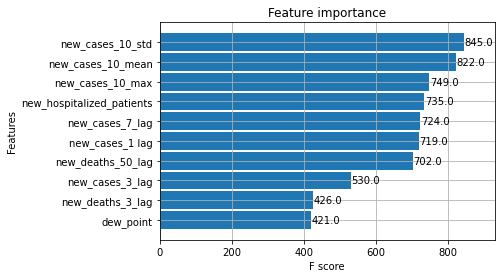

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

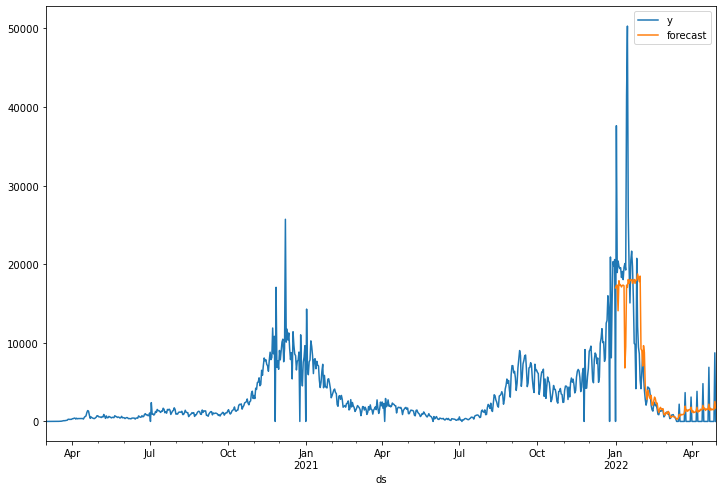

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

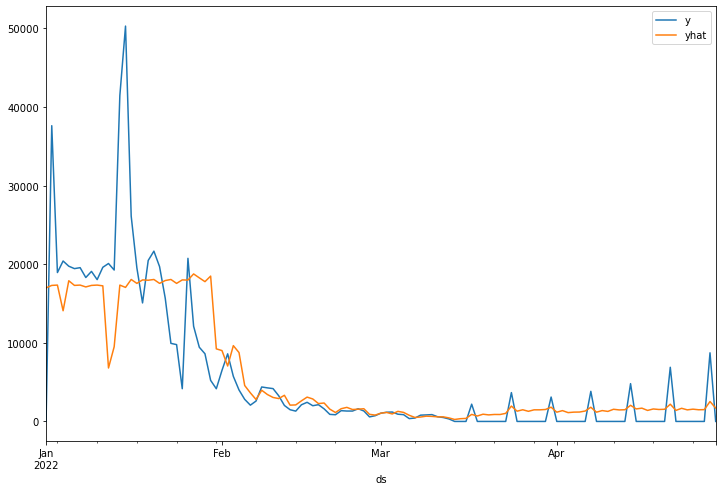

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  5632.719963010999
Test MAE:  2831.3201331130595
MASE =  1.1981200491566828


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

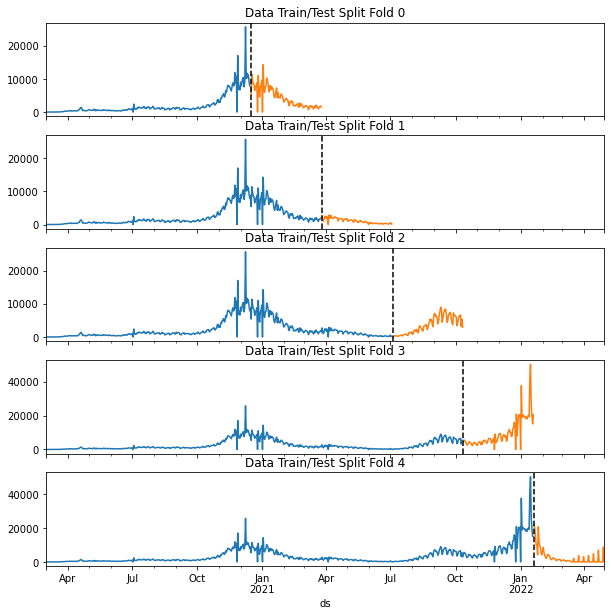

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[00:05:09] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4526.76424	validation_1-rmse:10802.96722
[100]	validation_0-rmse:2033.72808	validation_1-rmse:6480.31414
[200]	validation_0-rmse:1175.00116	validation_1-rmse:5401.19246
[300]	validation_0-rmse:853.38994	validation_1-rmse:5246.46782
[352]	validation_0-rmse:774.38142	validation_1-rmse:5232.56315
[00:05:09] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4526.76424	validation_1-rmse:10802.96722
[100]	validation_0-rmse:2033.72808	validation_1-rmse:6480.31414
[200]	validation_0-rmse:1175.00116	validation_1-rmse:5401.19246
[300]	validation_0-rmse:853.38994	validation_1-rmse:5246.46782
[352]	validation_0-rmse:774.38142	validation_1-rmse:5232.56315
[00:05:09] WARNI

<AxesSubplot:xlabel='ds'>

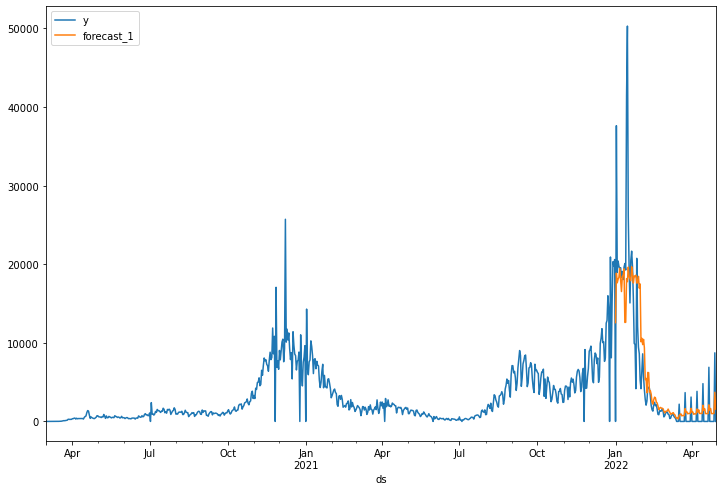

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

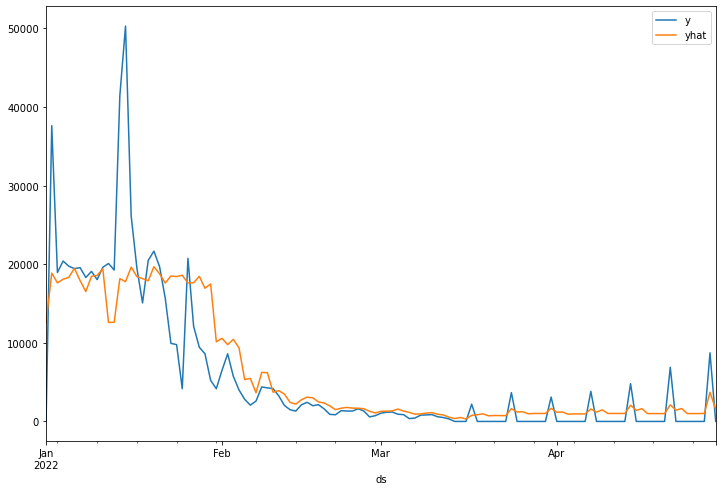

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [17]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast_1'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast_1'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast_1']))

Test RMSE:  5225.178541243545
Test MAE:  2591.747911469275
MASE =  1.0967410921763472
